# Zadanie 6

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]

Polecane źródła - teoria + intuicja:
- https://distill.pub/2019/paths-perspective-on-value-learning/
- https://www.youtube.com/watch?v=0iqz4tcKN58&ab_channel=SteveBrunton

In [1]:
import numpy as np
import gym
import random
from matplotlib import pyplot as plt

In [2]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: int,
        action_space: int,
        learning_rate: float = 0.1,
        gamma: float = 0.9,
        epsilon: float = 0.1,
    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((self.observation_space, self.action_space))

    def __call__(self, state: np.ndarray, action: np.ndarray) -> np.ndarray:
        """Return Q-value of given state and action."""
        return self.q_table[state, action]

    def update(self, state: np.ndarray, action: np.ndarray, reward: float, next_state) -> None:
        """Update Q-value of given state and action."""
        best_next_action = np.max(self.q_table[next_state])
        td_target = reward + self.gamma * best_next_action
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] = self.q_table[state, action] + self.learning_rate * td_error

    def get_best_action(self, state: np.ndarray) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, self.action_space)
        else:
            return np.argmax(self.q_table[state])

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        return f"QLearningSolver(learning_rate={self.learning_rate}, gamma={self.gamma}, epsilon={self.epsilon})"

    def __str__(self):
        return self.__repr__()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
def train_taxi_agent(learning_rate=0.1, gamma=0.9, epsilon=0.1, episodes=1000, max_steps=100):
    env = gym.make("Taxi-v3")
    solver = QLearningSolver(
        observation_space=env.observation_space.n,
        action_space=env.action_space.n,
        learning_rate=learning_rate,
        gamma=gamma,
        epsilon=epsilon,
    )
    rewards = []
    successful_try = 0
    results = []
    for episode in range(1, episodes+1):
        state = env.reset()
        total_reward = 0
        done = False
        for _ in range(max_steps):
            action = solver.get_best_action(state)
            next_state, reward, done, _ = env.step(int(action))
            solver.update(state, action, float(reward), next_state)
            state = next_state
            total_reward += reward

            if done:
                break
        if done:
            successful_try += 1

        rewards.append(total_reward)
        results.append(done)

    env.close()
    print(f"Successful epochs: {successful_try}/{episodes}")
    return solver, rewards, results

In [18]:
def test(solver, nr_tests, tries):
    env = gym.make("Taxi-v3")
    rewards = []
    results = []
    successful_try = 0

    for test in range(nr_tests):
        state = env.reset()
        total_reward = 0
        done = False
        for _ in range(tries):
            action = np.argmax(solver.q_table[state])
            next_state, reward, done, _ = env.step(int(action))
            state = next_state
            total_reward += reward

            if done:
                break

        if done:
            successful_try += 1

        rewards.append(total_reward)
        results.append(done)

    print(f"Successful tests: {successful_try}/{nr_tests}")
    accuracy = successful_try/nr_tests
    print(f"Accuracy: {accuracy*100:.2f}%")
    env.close()
    return rewards, results, accuracy

# Eksperymenty

**Badanie algorytmu dla wartości domyślnych learning_rate=0.1, gamma=0.9, epsilon=0.1**

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Successful epochs: 450/1000


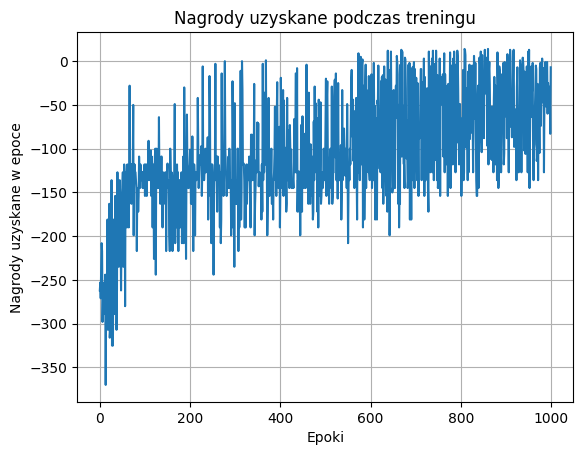

In [5]:
train_epochs = 1000
solver, rewards, results = train_taxi_agent(episodes=train_epochs)
plt.plot([x for x in range(train_epochs)], rewards)
plt.xlabel("Epoki")
plt.ylabel("Nagrody uzyskane w epoce")
plt.title("Nagrody uzyskane podczas treningu")
plt.grid()
plt.show()

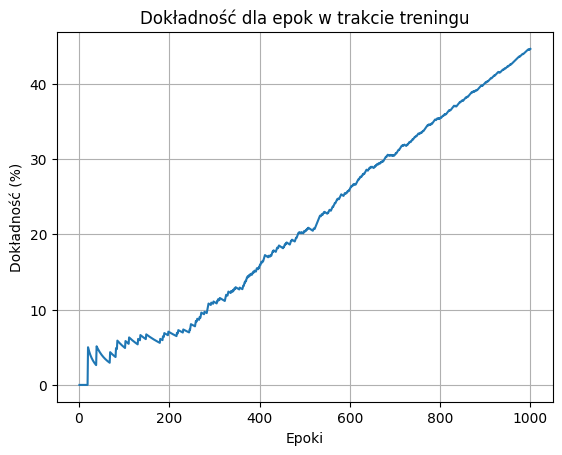

In [ ]:
cumulative_success = np.cumsum(results)
total_episodes = np.arange(1, len(results) + 1)
accuracy = cumulative_success / total_episodes * 100

plt.plot(total_episodes, accuracy)
plt.title("Dokładność dla epok w trakcie treningu")
plt.xlabel("Epoki")
plt.ylabel("Dokładność (%)")
plt.grid()
plt.show()

In [8]:
nr_tests = 1000
rewards, results, accuracy = test(solver, nr_tests, 100)

Successful tests: 193/1000
Accuracy: 19.30%


**Zmiana parametru learning_rate**

Successful epochs: 480/1000
Successful epochs: 683/1000
Successful epochs: 767/1000
Successful epochs: 844/1000
Successful epochs: 873/1000
Successful epochs: 883/1000


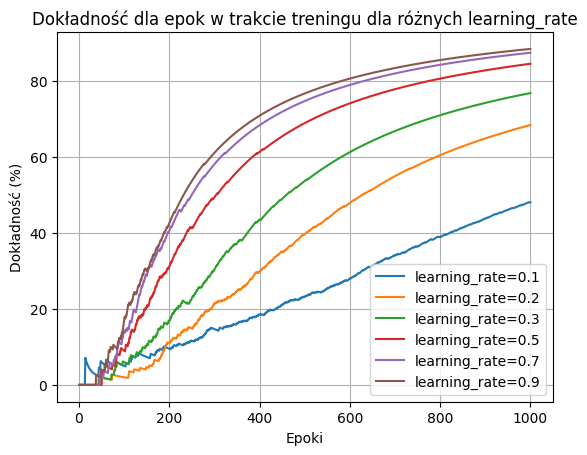

In [10]:
learning_rates = [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
for lr in learning_rates:
    _, _, results = train_taxi_agent(learning_rate=lr, episodes=1000, max_steps=100)
    cumulative_success = np.cumsum(results)
    total_episodes = np.arange(1, len(results) + 1)
    accuracy = cumulative_success / total_episodes * 100

    plt.plot(total_episodes, accuracy, label=f"learning_rate={lr}")

plt.title("Dokładność dla epok w trakcie treningu dla różnych learning_rate")
plt.xlabel("Epoki")
plt.ylabel("Dokładność (%)")
plt.legend()
plt.grid()
plt.show()

Successful epochs: 454/1000
Successful tests: 161/1000
Accuracy: 16.10%
Successful epochs: 680/1000
Successful tests: 653/1000
Accuracy: 65.30%
Successful epochs: 765/1000
Successful tests: 839/1000
Accuracy: 83.90%
Successful epochs: 842/1000
Successful tests: 951/1000
Accuracy: 95.10%
Successful epochs: 865/1000
Successful tests: 965/1000
Accuracy: 96.50%
Successful epochs: 878/1000
Successful tests: 986/1000
Accuracy: 98.60%


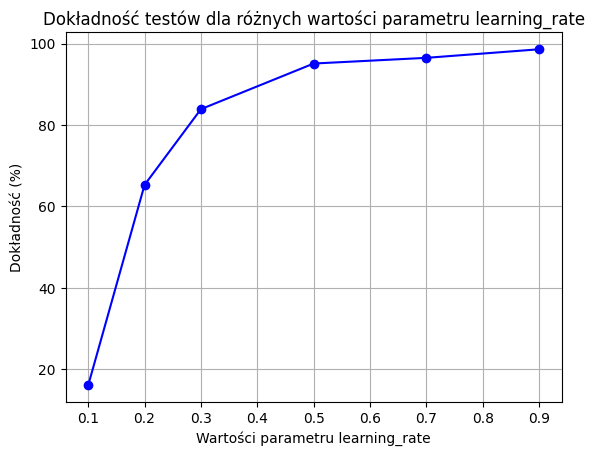

In [12]:
accuracies = []
for lr in learning_rates:
      solver, _, _ = train_taxi_agent(learning_rate=lr, episodes=1000, max_steps=100)
      _, _, test_accuracy = test(solver, nr_tests=1000, tries=100)
      accuracies.append(test_accuracy * 100)

plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.title("Dokładność testów dla różnych wartości parametru learning_rate")
plt.xlabel("Wartości parametru learning_rate")
plt.ylabel("Dokładność (%)")
plt.grid()
plt.show()

Successful epochs: 874/1000


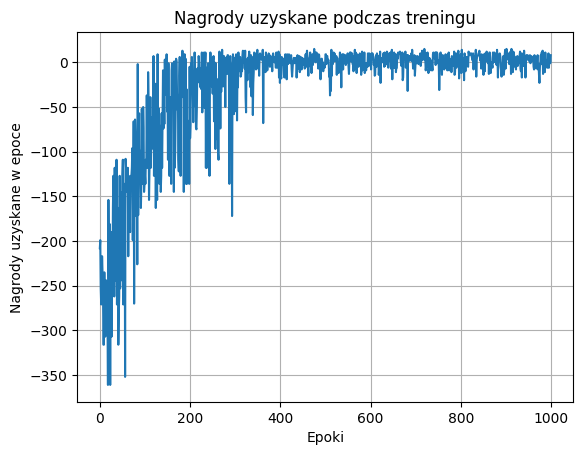

In [ ]:
train_epochs = 1000
solver, rewards, results = train_taxi_agent(learning_rate = 0.9, episodes=train_epochs)
plt.plot([x for x in range(train_epochs)], rewards)
plt.xlabel("Epoki")
plt.ylabel("Nagrody uzyskane w epoce")
plt.title("Nagrody uzyskane podczas treningu")
plt.grid()
plt.show()

**Zmiana parametru gamma**

Successful epochs: 609/1000
Successful epochs: 721/1000
Successful epochs: 761/1000
Successful epochs: 806/1000
Successful epochs: 815/1000
Successful epochs: 835/1000


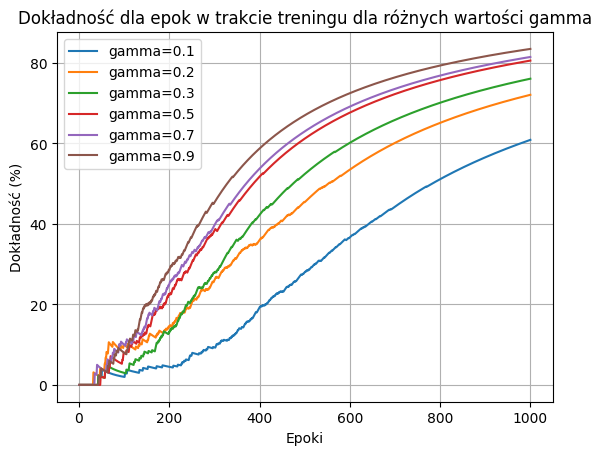

In [ ]:
gammas = [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
for gm in gammas:
    _, _, results = train_taxi_agent(learning_rate = 0.5, gamma=gm, episodes=1000, max_steps=100)
    cumulative_success = np.cumsum(results)
    total_episodes = np.arange(1, len(results) + 1)
    accuracy = cumulative_success / total_episodes * 100

    plt.plot(total_episodes, accuracy, label=f"gamma={gm}")

plt.title("Dokładność dla epok w trakcie treningu dla różnych wartości gamma")
plt.xlabel("Epoki")
plt.ylabel("Dokładność (%)")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

Successful epochs: 613/1000
Successful tests: 545/1000
Accuracy: 54.50%
Successful epochs: 708/1000
Successful tests: 702/1000
Accuracy: 70.20%
Successful epochs: 753/1000
Successful tests: 782/1000
Accuracy: 78.20%
Successful epochs: 807/1000
Successful tests: 900/1000
Accuracy: 90.00%
Successful epochs: 829/1000
Successful tests: 982/1000
Accuracy: 98.20%
Successful epochs: 837/1000
Successful tests: 987/1000
Accuracy: 98.70%


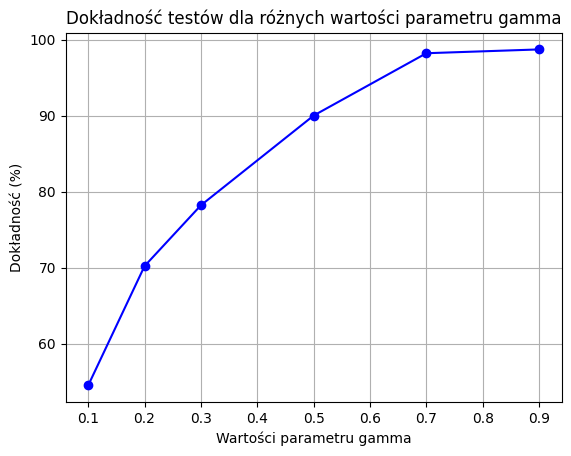

In [ ]:
accuracies = []
for gm in gammas:
      solver, _, _ = train_taxi_agent(learning_rate=0.5, gamma=gm, episodes=1000, max_steps=100)
      _, _, test_accuracy = test(solver, nr_tests=1000, tries=100)
      accuracies.append(test_accuracy * 100)

plt.plot(gammas, accuracies, marker='o', linestyle='-', color='b')
plt.title("Dokładność testów dla różnych wartości parametru gamma")
plt.xlabel("Wartości parametru gamma")
plt.ylabel("Dokładność (%)")
plt.grid()
plt.show()

**Zmiana wartości parametru epsilon**

Successful epochs: 842/1000
Successful epochs: 832/1000
Successful epochs: 807/1000
Successful epochs: 767/1000
Successful epochs: 738/1000
Successful epochs: 655/1000
Successful epochs: 442/1000
Successful epochs: 111/1000


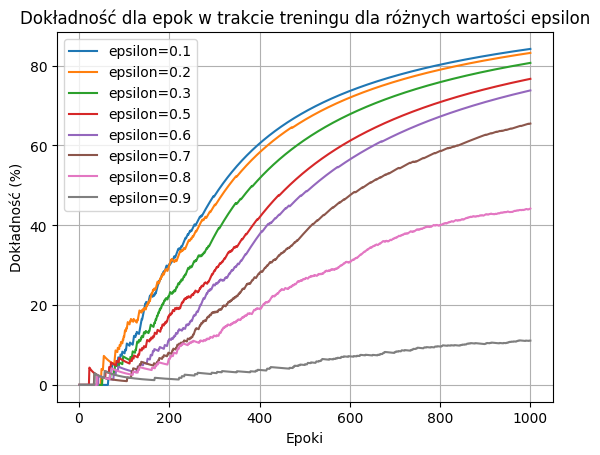

In [13]:
epsilons = [0.1, 0.2, 0.3, 0.5,0.6, 0.7, 0.8, 0.9]
for ep in epsilons:
        _, _, results = train_taxi_agent(learning_rate = 0.5, epsilon=ep, episodes=1000, max_steps=100)
        cumulative_success = np.cumsum(results)
        total_episodes = np.arange(1, len(results) + 1)
        accuracy = cumulative_success / total_episodes * 100

        plt.plot(total_episodes, accuracy, label=f"epsilon={ep}")

plt.title("Dokładność dla epok w trakcie treningu dla różnych wartości epsilon")
plt.xlabel("Epoki")
plt.ylabel("Dokładność (%)")
plt.legend()
plt.grid()
plt.show()

Successful epochs: 838/1000
Successful tests: 961/1000
Accuracy: 96.10%
Successful epochs: 825/1000
Successful tests: 939/1000
Accuracy: 93.90%
Successful epochs: 810/1000
Successful tests: 955/1000
Accuracy: 95.50%
Successful epochs: 762/1000
Successful tests: 977/1000
Accuracy: 97.70%
Successful epochs: 739/1000
Successful tests: 972/1000
Accuracy: 97.20%
Successful epochs: 651/1000
Successful tests: 989/1000
Accuracy: 98.90%
Successful epochs: 411/1000
Successful tests: 998/1000
Accuracy: 99.80%
Successful epochs: 130/1000
Successful tests: 1000/1000
Accuracy: 100.00%


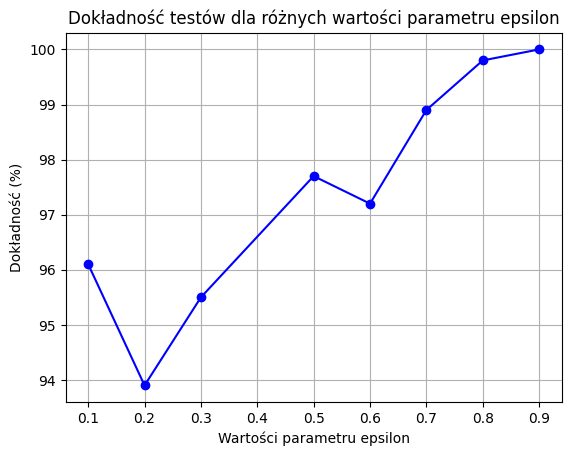

In [20]:
accuracies = []
for ep in epsilons:
      solver, _, _ = train_taxi_agent(learning_rate=0.5, epsilon=ep, episodes=1000, max_steps=100)
      _, _, test_accuracy = test(solver, nr_tests=1000, tries=100)
      accuracies.append(test_accuracy * 100)

plt.plot(epsilons, accuracies, marker='o', linestyle='-', color='b')
plt.title("Dokładność testów dla różnych wartości parametru epsilon")
plt.xlabel("Wartości parametru epsilon")
plt.ylabel("Dokładność (%)")
plt.grid()
plt.show()

**Testowanie najlepszych parametrów: learning_rate=0.9, gamma=0.9, epsilon=0.3**

Successful epochs: 862/1000


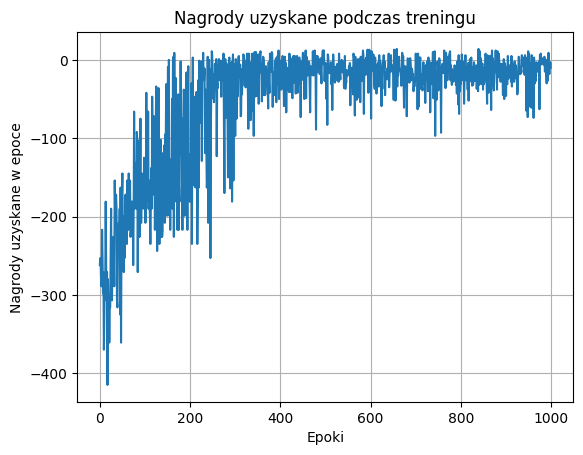

In [22]:
train_epochs = 1000
solver, rewards, results = train_taxi_agent(learning_rate=0.9, gamma=0.9, epsilon=0.3,episodes=train_epochs)
plt.plot([x for x in range(train_epochs)], rewards)
plt.xlabel("Epoki")
plt.ylabel("Nagrody uzyskane w epoce")
plt.title("Nagrody uzyskane podczas treningu")
plt.grid()
plt.show()

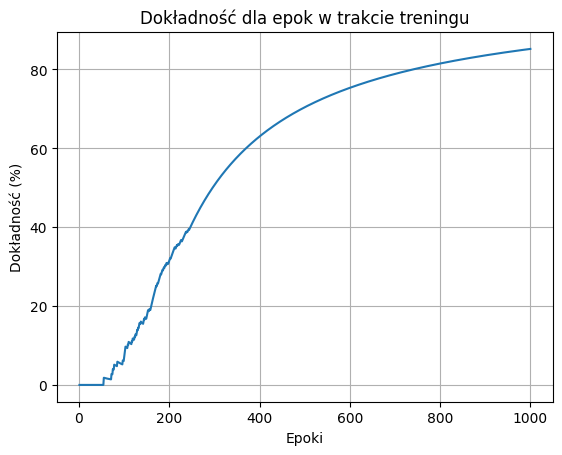

In [ ]:
cumulative_success = np.cumsum(results)
total_episodes = np.arange(1, len(results) + 1)
accuracy = cumulative_success / total_episodes * 100

plt.plot(total_episodes, accuracy)
plt.title("Dokładność dla epok w trakcie treningu")
plt.xlabel("Epoki")
plt.ylabel("Dokładność (%)")
plt.grid()
plt.show()

In [ ]:
nr_tests = 1000
rewards, results, accuracy = test(solver, nr_tests, 100)

Successful tests: 1000/1000
Accuracy: 100.00%


# Wnioski

**Testowanie algorytmu przy parametrach domyślnych learning_rate=0.1, gamma=0.9, epsilon=0.1**

Dla parametrów domyślnych ukazano skumulowane nagrody uzyskane podczas z treningu dla każdej z epok - na wykresie tym widać proces uczenia się algorytmu, ponieważ z każdą kolejną epoką rośnie wartość skumulowanej nagrody, a rozrzut przedziału uzyskanych nagród maleje. Po 1000 epokach jednak uzyskana wartość nagrody jest bardzo mała. W trakcie treningu uzyskana dokładność (określona jako ilość epok zakończonych sukcesem) rośnie liniowo wraz ze zwiększaniem się liczby epok. Dokładność wykazana na testach jest jednak bardzo mała - wynosi ona około 18%.

**Wpływ zmiany parametru learning_rate na działanie algorytmu**

Wraz ze zwiększaniem parametru learning_rate następuje znaczna poprawa działania algorytmu, wykazana przez dokładność uzyskaną w trakcie treningu dla każdej z epok. Większa wartość tego parametru sprawia, że algorytm znacznie szybciej się uczy i więcej epok w trakcie treningu zakończonych jest sukcesem.
Znacząco rośnie również dokładność algorytmu podczas testów - dla wartości parametru równej 0.9 uzyskiwana jest prawie 100% skuteczność. Widać, że algorytm szybciej się uczy również na wykresie skumulowanej nagrody w trakcie treningu - w porównaniu do tego samego wykresu dla learning_rate=0.1 Wartość nagrody rośnie znacznie szybciej i mniejszy jest rozrzut tej wartości dla późniejszych epok.
Learning rate kontroluje tempo, w jakim algorytm dostosowuje wartości tablicy Q na podstawie nowych informacji.

**Wpływ zmiany parametru gamma na działanie algorytmu**

Zwiększenie parametru gamma, podobnie do learning_rate, również powoduje poprawę dokładności otrzymywanej zarówno w trakcie treningu, jak i testów. Wpływ tej zmiany jest jednak mniejszy, a poprawa dokładności zachodzi wolniej niż w przypadku zmiany parametru learning_rate. Najlepsze wyniki testów uzyskane zostały dla wartości gamma=0.9.
Gamma określa znaczenie przyszłych nagród w porównaniu do natychmiastowych nagród. Przy wysokiej wartości gamma algorytm bardziej skupia się na maksymalizacji długoterminowych nagród, a przy niskiej wartości skupia się głównie na nagrodach natychmiastowych. Większa wartość jest w tym przypadku lepsza, ponieważ środkowisko jest bardziej skomplikowane i wymaga większego planowania.

**Wpływ zmiany parametru epsilon na działanie algorytmu**

Zwiększanie wartości parametru epsilon ma działanie całkowicie odwrotne do zwiększania parametrów learning_rate i gamma - im większa jest ta wartość tym gorsza jest dokładność uzyskiwana w trakcie treningu i mniej epok zakończonych jest sukcesem. Testy za to osiągają wysoką dokładność i osiągają najlepszy wynik dla epsilon = 0.9. Może być to spowodowane tym, że o ile podczas treningu mało epok zakończonych jest sukcesem, to algorytm rozbudowuje swoją tablicę Q przez wysoką losowość i po zakończeniu treningu, kiedy podczas testów wybierana jest najlepsza opcja, algorytm zna najlepsze ścieżki do poprawnego wykonania zadania. Epsilon kontroluje eksplorację środowiska poprzez losowy wybór akcji.
Przy wysokiej wartości epsilon algorytm wykonuje więcej losowych akcji, co pozwala lepiej eksplorować środowisko, ale spowalnia proces uczenia.
Przy niskiej wartości epsilon algorytm wykonuje bardziej deterministyczne akcje, co przyspiesza eksploatację najlepszych rozwiązań, ale ryzykuje nieznalezieniem lepszych, dostępnych rozwiązań. Należy więc w tym przypadku zachować odpowiedni balans.